In [1]:
import numpy as np
import enzope
from matplotlib import pyplot as plt
import sys
import os

In [8]:
m = enzope.CPUModel(n_agents=1000, f=.3, measure_every=1)
m.MCS(10000)

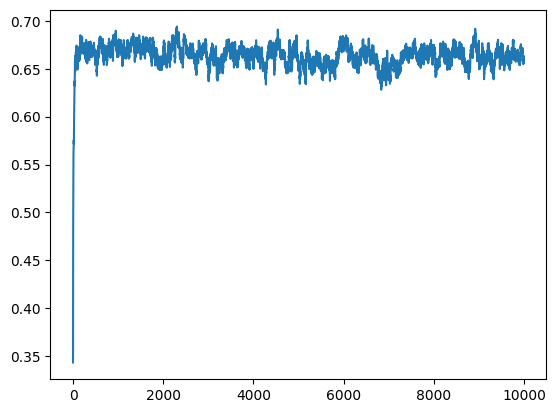

In [9]:
# plot gini vs t
fig, ax = plt.subplots()
ax.plot(m.gini, label=f'gini={np.mean(m.gini[-1000:]):.2f}')

n=1000, w_top=0.50, w_bot=0.04, w_top/w_bot=13.59


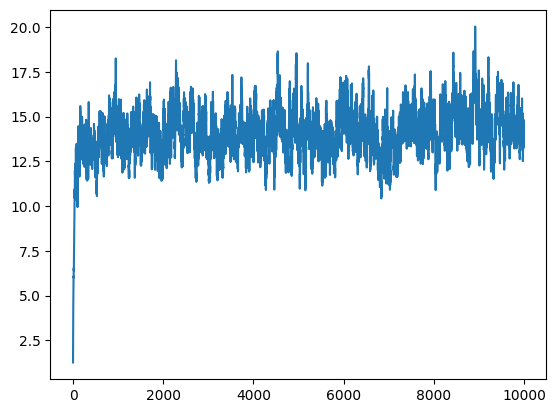

In [11]:
### Palma con todos los agentes
w_sorted = np.sort(m.w)
n = len(w_sorted)
w_top = np.sum(w_sorted[-int(.1*n):])
w_bot = np.sum(w_sorted[:int(.4*n)])
print(f'n={n}, w_top={w_top:.2f}, w_bot={w_bot:.2f}, w_top/w_bot={w_top/w_bot:.2f}')
plt.plot(m.palma, label=f'Palma={w_top/w_bot:.2f}')

In [12]:
w_sorted = np.sort(m.w[m.w > 1e-10])
n = len(w_sorted)
w_top = np.sum(w_sorted[-int(.1*n):])
w_bot = np.sum(w_sorted[:int(.4*n)])
print(f'n={n}, w_top={w_top:.2f}, w_bot={w_bot:.2f}, w_top/w_bot={w_top/w_bot:.2f}')

n=839, w_top=0.46, w_bot=0.08, w_top/w_bot=5.93


In [13]:
def lor_curve(w_set, labels, savefile=None):
    fig, ax = plt.subplots(dpi=200)

    ax.set_ylabel("Cumulative wealth")
    ax.set_xlabel("Fraction of agents")
    ax.set_xticks(np.arange(0, 1.05, 0.05), minor=True)
    ax.set_yticks(np.arange(0, 1.05, 0.05), minor=True)

    # Plot gini=0 curve
    ax.plot([0, 1], [0, 1], color="k", label="Total equality")
    # Plot uniform distribution curve
    agent = np.random.rand(10000)
    # Normalize wealth
    agent /= np.sum(agent)
    agent = np.sort(agent)
    ax.plot(
        np.linspace(0, 1, agent.shape[0]),
        np.cumsum(agent) / np.sum(agent),
        label="Initial condition", color="black",
        linestyle="--",
    )

    for w, label in zip(w_set, labels):

        w = np.sort(w)

        ax.plot(
            np.linspace(0, 1, w.shape[0]),
            np.cumsum(w) / np.sum(w),
            label=label,
        )
        ax.grid(which="minor", alpha=0.5, linestyle="--")
        ax.grid(which="major", alpha=1, linestyle="-")

    ax.legend(fontsize=8)

    plt.show()
    if savefile:
        fig.savefig(os.path.join(savefile, "lorenz_curve"), format="png")

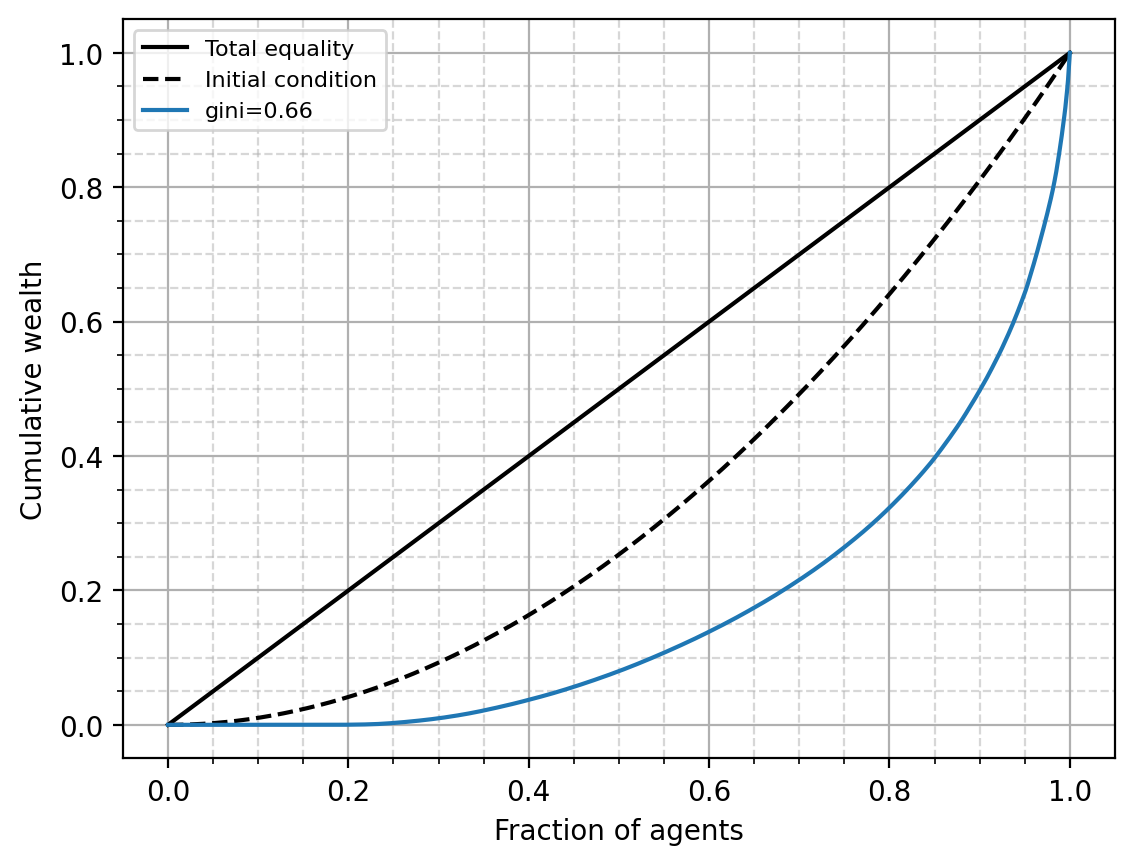

In [14]:
lor_curve([m.w], [f'gini={np.mean(m.gini[-1000:]):.2f}'])